In [2]:
import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import DataLoader,Dataset
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import sys,os

base_dir = os.path.dirname(os.path.abspath('tensorboard_methods.ipynb'))
work_dir = os.path.dirname(base_dir)
sys.path.append(work_dir)

from tools.common_tools import set_seed
from tools.my_dataset import RMBdataset

set_seed(3407)


d:\Anaconda3\envs\pytorch\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] 找不到指定的程序。
  warn(f"Failed to load image Python extension: {e}")


SummaryWriter 提供创建eventfile的高级接口 params：

log_dir:event file输出文件夹

comment：不指定log_dir时 文件夹后缀

filename——suffix：eventfile文件名后缀


In [ ]:
writer = SummaryWriter(comment='test_comment',filename_suffix='test_suffix')
for x in range(100):
    writer.add_scalar('y = 2x',2*x,x)
    writer.add_scalar('y=2^x',2**x,x)
    writer.add_scalars('data/scalar_group',{'y = xsinx':x*np.sin(x),'y = xcosx':x*np.cos(x)},x)

writer.close()

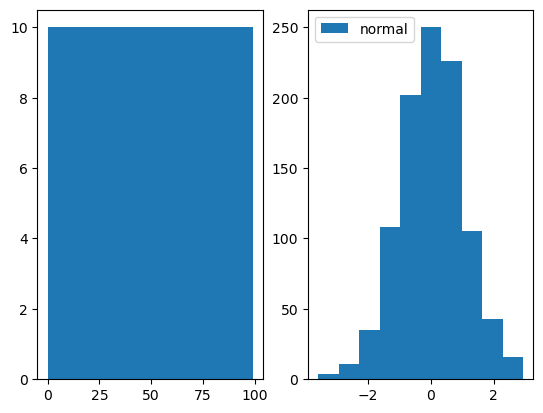

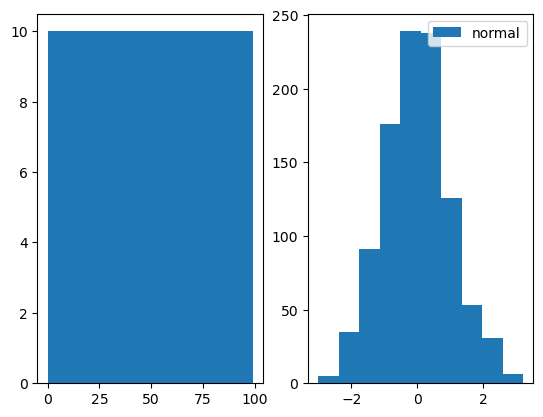

In [2]:
writer = SummaryWriter(comment='__test__histogram__',filename_suffix='__histogram')

for x in range(2):
    data_union = np.arange(100)
    data_normal = np.random.normal(size=1000)

    writer.add_histogram('distribution union',data_union,x)
    writer.add_histogram('distribution normal',data_normal,x)

    plt.subplot(121).hist(data_union,label='union')
    plt.subplot(122).hist(data_normal,label='normal')
    plt.legend()
    plt.show()

writer.close()

Summary Writer 

add_image():记录图像 params：

tag：图像标签名，图的唯一标识

img_tensor:图像数据 注意尺度

global_step:X轴

dataformats:数据形式 CHW HWC HW 默认chw

torchvision.utlis.make_grid:制作网格图像 params：

tensor:图像数据 B C H W格式

nrow:行数（列数自动计算 错误的 nrow是每行显示的图像数量

padding:图像间距（像素单位

normalize:是否将像素值标准化

range:标准化范围

scale_each:是否单张图维度标准化

pad_value:padding的像素值

In [ ]:
i = torch.randn((1,2,3,1))
x = torch.unsqueeze(i,dim=1)
y = i[0,:,:,:]
y.shape

SummaryWriter add_graph():可视化模型计算图 params：

model：模型 必须是nn.module

input_to_model:给模型的数据

verbose:是否打印计算图结构信息


In [5]:
from torchsummary import summary
import torchvision.models as models

In [6]:
net = models.AlexNet()
summary(net,input_size=(3,227,227),batch_size=16)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [16, 64, 56, 56]          23,296
              ReLU-2           [16, 64, 56, 56]               0
         MaxPool2d-3           [16, 64, 27, 27]               0
            Conv2d-4          [16, 192, 27, 27]         307,392
              ReLU-5          [16, 192, 27, 27]               0
         MaxPool2d-6          [16, 192, 13, 13]               0
            Conv2d-7          [16, 384, 13, 13]         663,936
              ReLU-8          [16, 384, 13, 13]               0
            Conv2d-9          [16, 256, 13, 13]         884,992
             ReLU-10          [16, 256, 13, 13]               0
           Conv2d-11          [16, 256, 13, 13]         590,080
             ReLU-12          [16, 256, 13, 13]               0
        MaxPool2d-13            [16, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [16, 25